In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 5000
pd.options.display.max_colwidth = 400
pd.options.display.max_columns = 100

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report




In [4]:
# !pip3 install xgboost

In [5]:
!pwd

/Users/priyanshchaudhary/Downloads/Downloads_backup


In [6]:
df = pd.read_csv('/Users/priyanshchaudhary/Downloads/creditcard.csv')
df.shape

(284807, 31)

In [7]:
df = df.drop_duplicates()
df.shape

(283726, 31)

## Data Exploration and Preprocessing

In [60]:
df.Class.value_counts(normalize=True).reset_index()

,Class,proportion
0,0,0.998333
1,1,0.001667


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [22]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Current Observation
- No nulls found in data
- Data is highly imbalance with 0.1% minority class 

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [11]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

In [12]:
x = df.copy()
x['id']= 'a'
x.pivot_table(index=['Class'],aggfunc=['count','mean', 'min', 'max'],values = ['Amount', 'Time']).reset_index()

Class   count                mean                  min              max  \
         Amount    Time      Amount          Time Amount   Time    Amount   
0     0  283253  283253   88.413575  94835.058093    0.0    0.0  25691.16   
1     1     473     473  123.871860  80450.513742    0.0  406.0   2125.87   

             
       Time  
0  172792.0  
1  170348.0

In [13]:
dfFraud = df[df['Class']==1]
dfNotFraud = df[df['Class']==0]

# Feature Analysis

In [14]:
# class_counts = df['Class'].value_counts()
# class_labels = ['Non-Fraud', 'Fraud']
# plt.figure(figsize=(6, 4))
# class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# plt.title('Class Distribution')
# plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
# plt.ylabel('Count')
# plt.show()

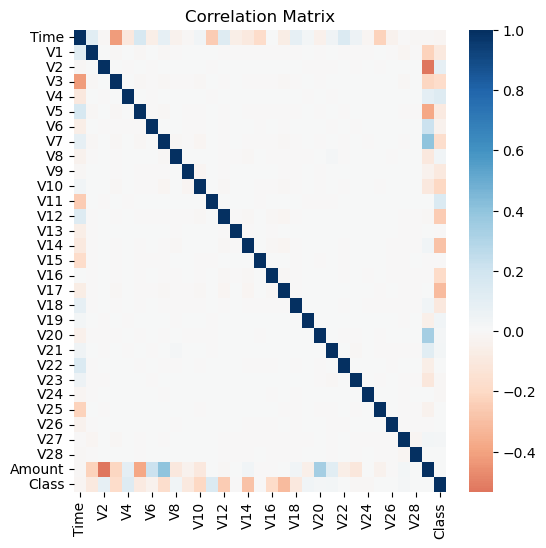

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), cmap='RdBu', center=0.0, annot=False )
plt.title('Correlation Matrix')
plt.show()

## Current Observation
- There is a high correlation between Amounf & V2 feature
- But since we have low amount of features, no need for exclusion.

### Time & AMount Analysis

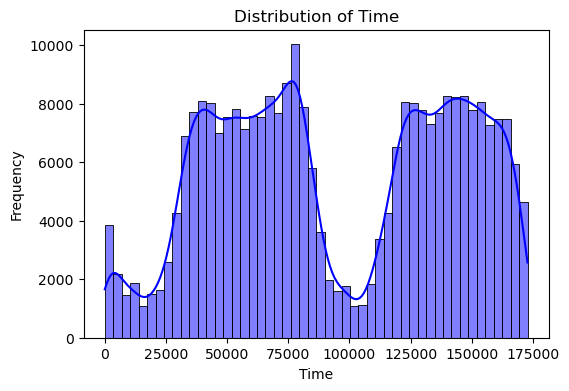

In [16]:
# plt.figure(figsize=(6, 4))
# sns.histplot(data=df, x='Time', bins=50, hue='Class', kde=False, multiple='stack')
# plt.title('Distribution of Time')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

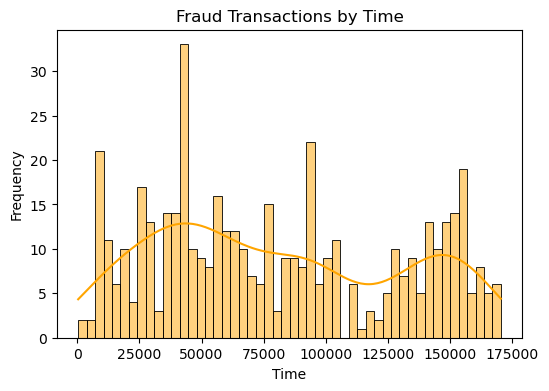

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(dfFraud['Time'], bins=50, kde=True, color='orange')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [18]:
dfFraud['TimeBkt'] = pd.cut(dfFraud['Time'], bins = [0,10000,25000,50000,100000,125000,150000,200000])
dfNotFraud['TimeBkt'] = pd.cut(dfNotFraud['Time'], bins = [0,10000,25000,50000,100000,125000,150000,200000])

In [19]:
dfFTime = dfFraud[['TimeBkt', 'Class']]
dfNFTime = dfNotFraud[['TimeBkt', 'Class']]
dfTime = pd.concat([dfFTime, dfNFTime])

In [20]:
dfTime['x'] = 'a'
dfTime.pivot_table(index='TimeBkt', aggfunc = {'Class':'mean'} )

,Class
TimeBkt,
"(0, 10000]",0.003393
"(10000, 25000]",0.004677
"(25000, 50000]",0.002270
"(50000, 100000]",0.001616
"(100000, 125000]",0.001229
"(125000, 150000]",0.001218
"(150000, 200000]",0.001255


In [21]:
dfFraud.TimeBkt.value_counts(normalize=True).reset_index().sort_values(['TimeBkt'])

,TimeBkt,proportion
6,"(0, 10000]",0.052854
5,"(10000, 25000]",0.065539
1,"(25000, 50000]",0.228330
0,"(50000, 100000]",0.312896
4,"(100000, 125000]",0.071882
2,"(125000, 150000]",0.147992
3,"(150000, 200000]",0.120507


In [22]:
dfNotFraud.TimeBkt.value_counts(normalize=True).reset_index().sort_values(['TimeBkt'])

,TimeBkt,proportion
5,"(0, 10000]",0.025924
6,"(10000, 25000]",0.023290
2,"(25000, 50000]",0.167562
0,"(50000, 100000]",0.322859
4,"(100000, 125000]",0.097546
1,"(125000, 150000]",0.202697
3,"(150000, 200000]",0.160123


## Time & amount were the only interpretable features:

- Observed that lesser consecutive time has more fraud probability
- Hence, creating new flag features for addition uplift

In [23]:
df['isTimeLt10000'] = np.where(df['Time']<=10000,1,0)
df['isTimeLt25000'] = np.where(df['Time']<=25000,1,0)
df['isTimeLt50000'] = np.where(df['Time']<=50000,1,0)

# Outliers

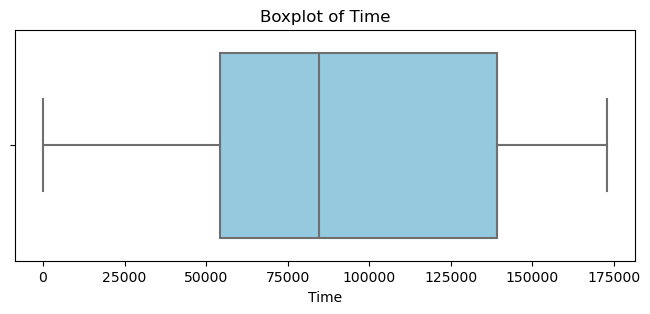

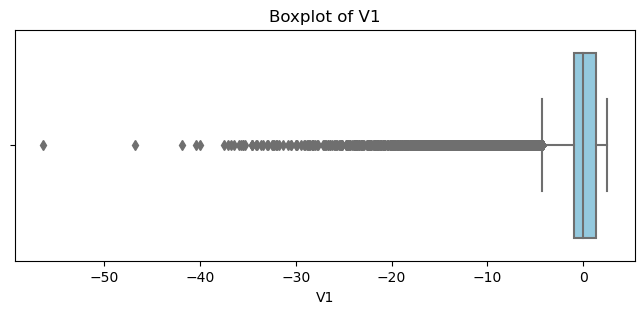

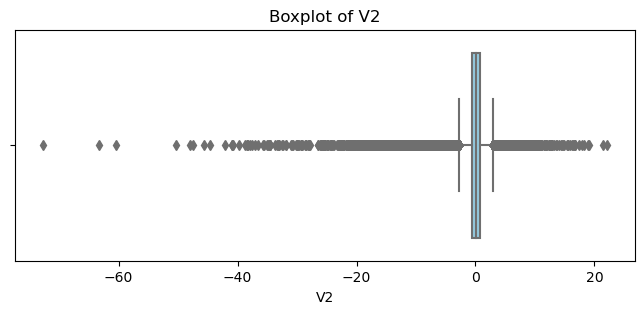

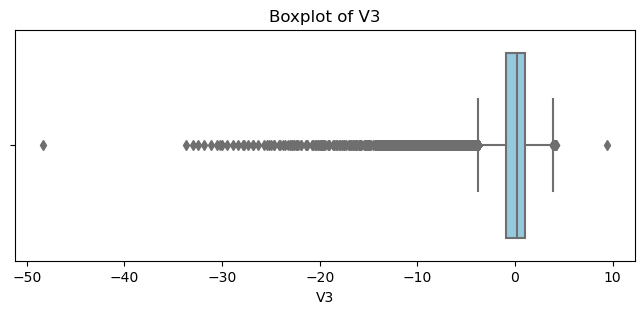

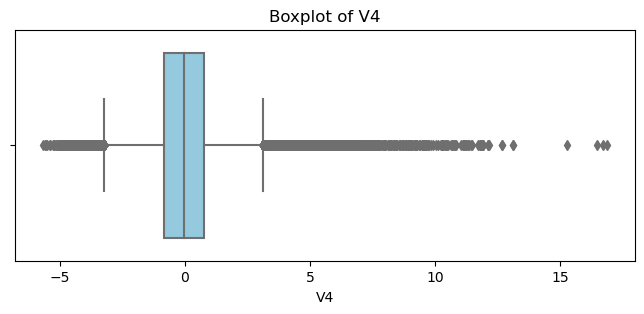

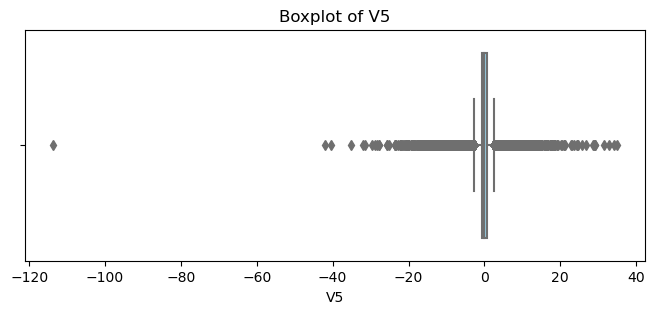

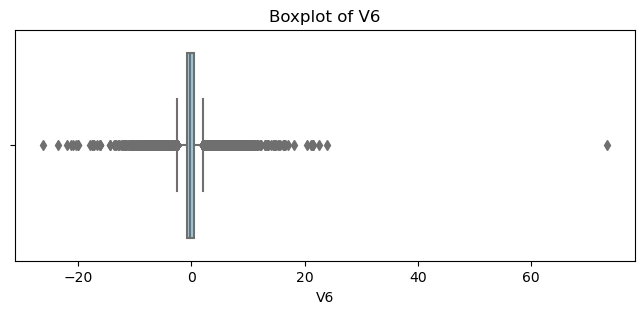

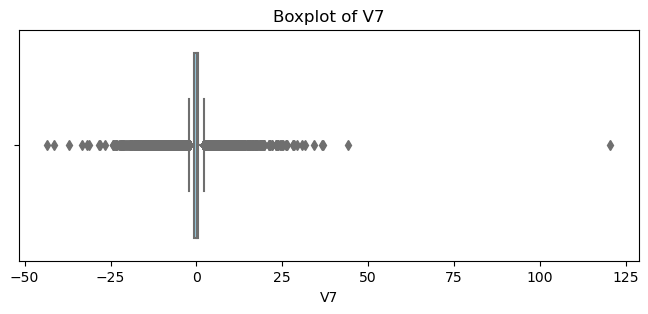

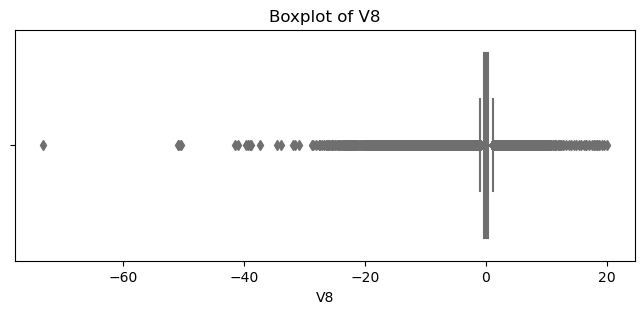

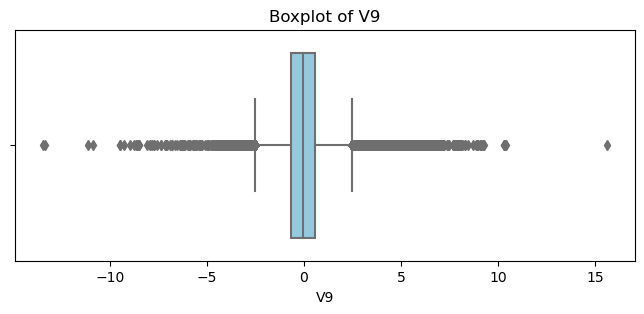

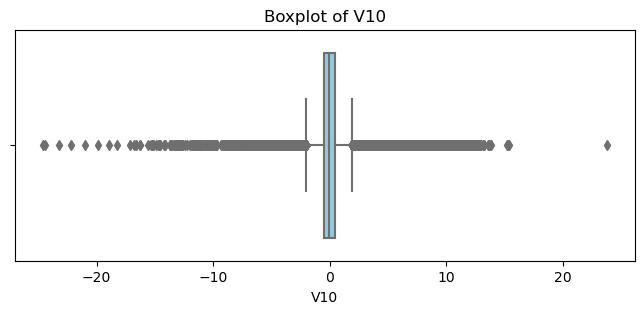

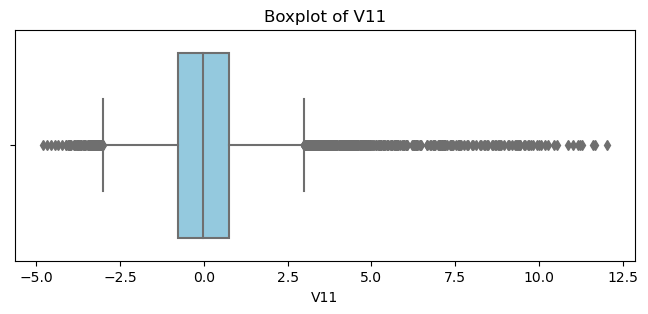

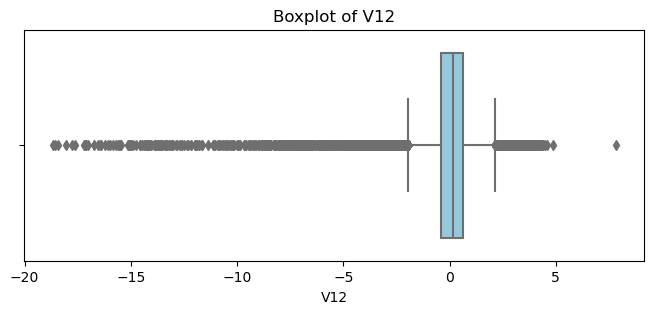

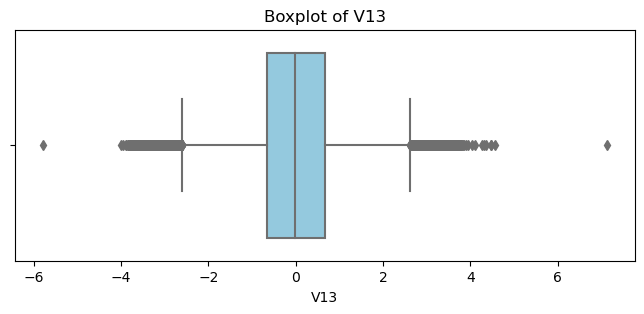

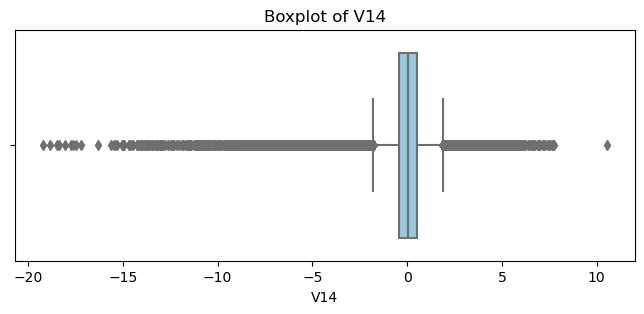

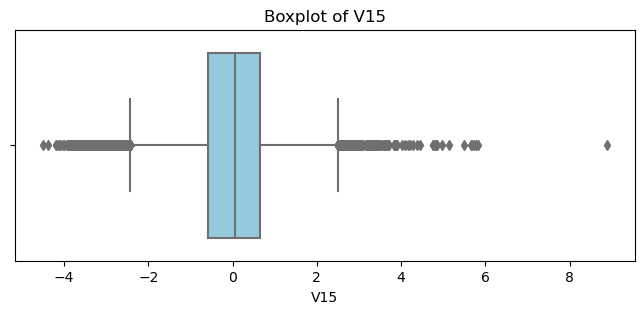

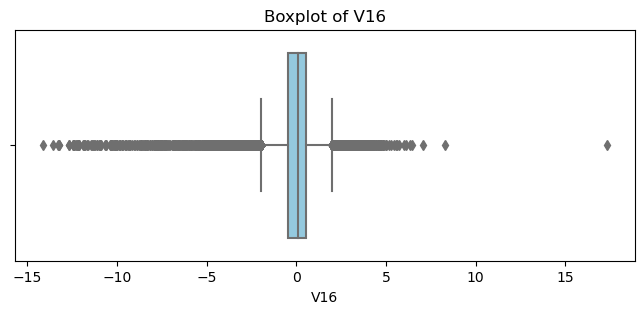

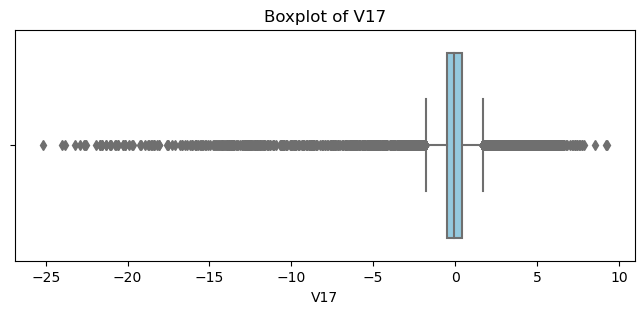

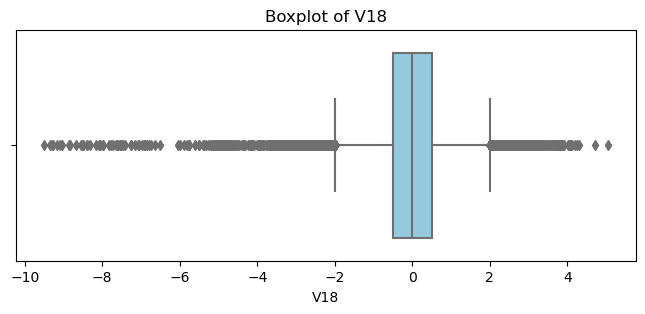

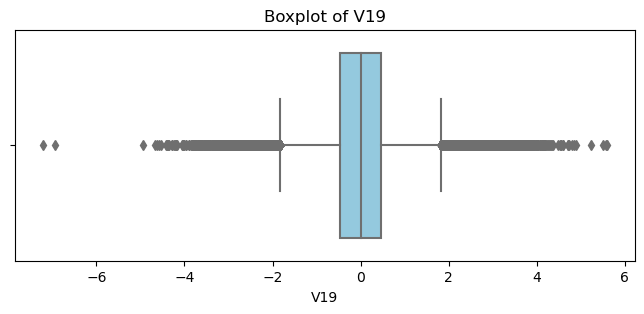

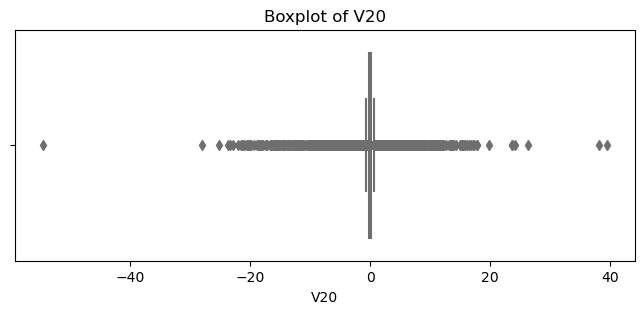

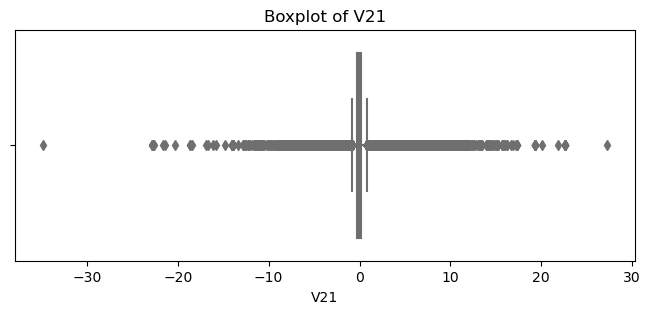

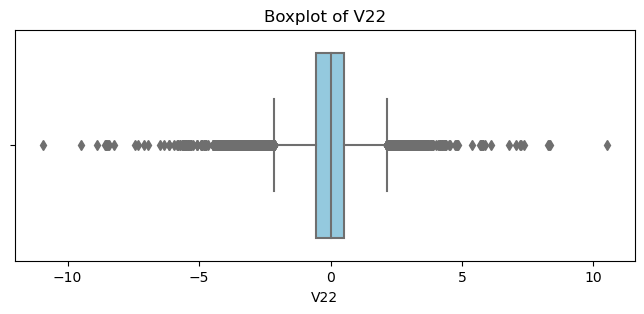

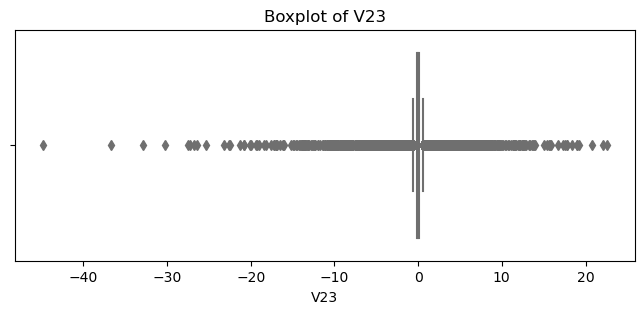

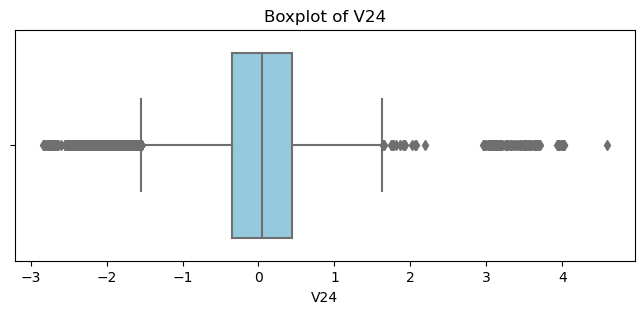

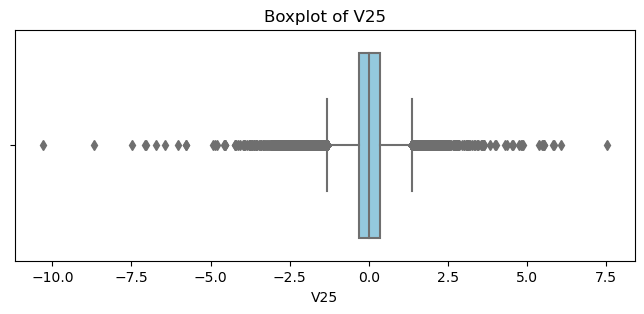

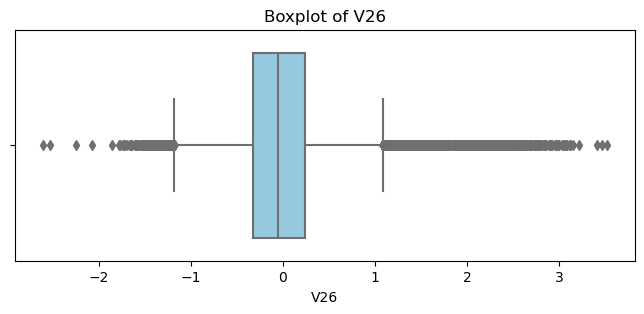

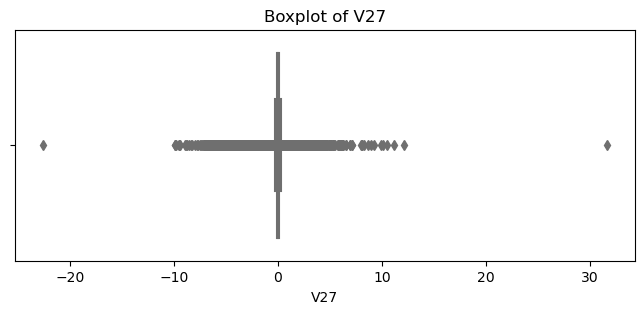

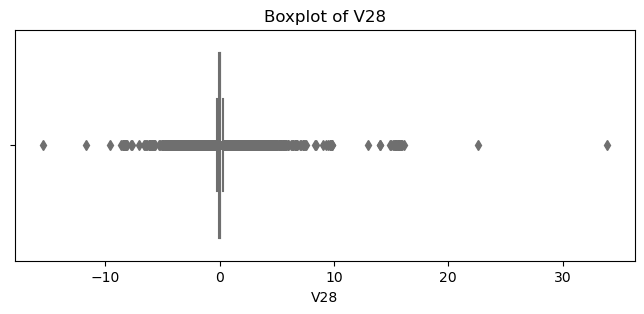

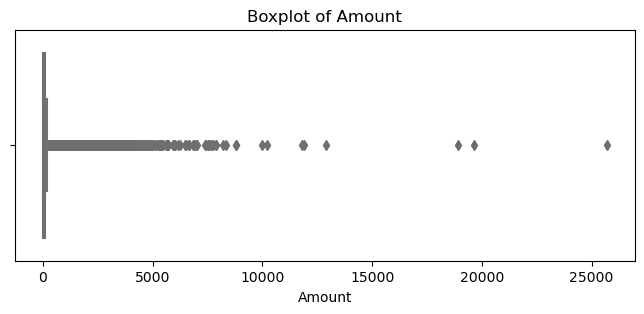

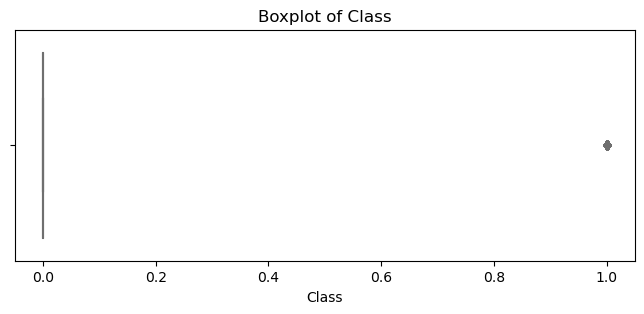

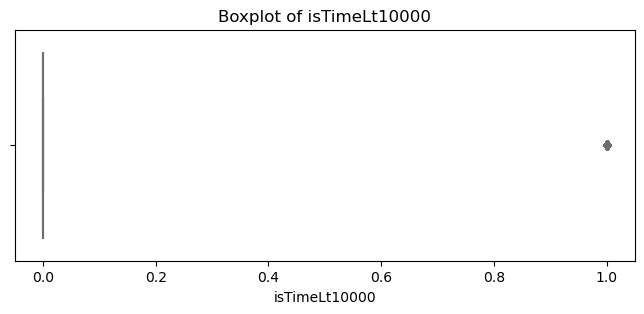

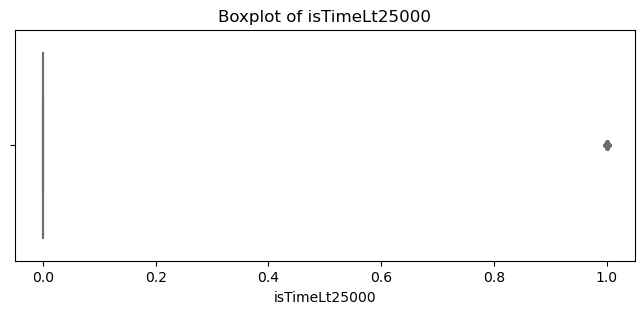

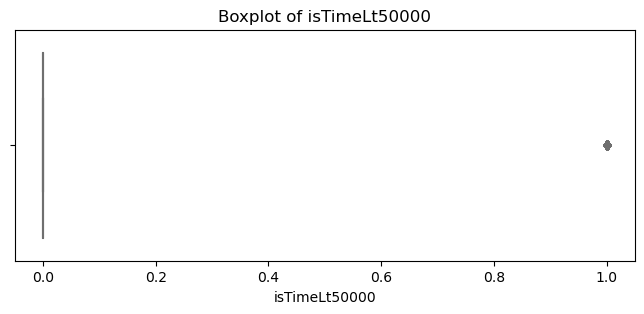

In [24]:
features = df.columns.to_list()
# features = ['Amount', 'V11', 'V2', 'V17', 'V4']
for feature in features:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [25]:
X=df.drop(columns='Class')

y=df['Class']

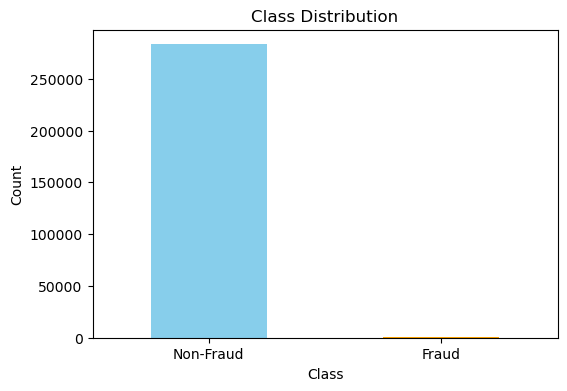

In [26]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

# Handling Imbalanced Data

- Instead of accuracy, use recall precision for accurate analysis of Fraud Class


- Using Stratified Splitting to ensure that the proportion of each class during the split remains correct.


# Model

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

### Using SMOTE
- to balance the class distribution

In [28]:
# !conda install imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
X_train_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isTimeLt10000,isTimeLt25000,isTimeLt50000
0,144549.0,2.238954,-1.724499,-2.151484,-2.577803,0.993668,3.565492,-1.785957,0.860122,-1.264003,1.567867,-0.235685,-0.705588,0.363543,-0.313460,0.285037,-0.577606,0.381516,-0.180758,-0.318110,-0.323810,-0.149574,-0.049333,0.278442,0.684735,-0.219028,-0.159167,0.037920,-0.049932,32.00,0,0,0
1,80716.0,-1.315062,1.630783,0.597001,-0.038359,-0.404580,-0.965712,0.212249,0.735381,-1.267926,-0.482635,1.437124,1.762389,1.254318,0.862657,-0.266203,0.393813,-0.265345,-0.343555,0.392417,-0.067580,-0.238898,-0.946773,0.323904,0.515632,-0.713000,-0.266503,-0.017794,0.051058,6.99,0,0,0
2,127116.0,1.908801,0.021184,-2.087997,0.129310,1.161468,0.605244,-0.022371,0.180296,0.283819,-0.497766,1.532977,1.039161,0.475691,-0.689465,0.964112,-0.277525,0.793328,-0.156680,-0.994654,-0.210474,0.293609,1.095842,-0.044874,-1.689517,0.106098,0.007758,0.045164,-0.053068,14.95,0,0,0
3,91342.0,1.811257,0.316556,0.316751,3.880231,0.048454,1.020163,-0.734868,0.233651,0.681423,1.146705,1.337319,-1.775051,2.178843,1.239627,-2.037103,1.344143,-0.475182,0.824830,-1.693484,-0.228032,0.138869,0.700422,0.174064,0.702997,-0.212523,-0.010018,-0.017740,-0.038006,17.30,0,0,0
4,29522.0,1.358817,-1.120881,0.550266,-1.547659,-1.194950,0.275448,-1.201843,0.212889,-2.094285,1.492821,1.737807,0.014396,0.329795,-0.044638,0.473131,-0.659717,0.787525,-0.641416,-0.591751,-0.361686,-0.340972,-0.636442,0.252758,-0.344160,-0.064282,-0.439622,0.062524,0.013095,24.00,0,0,1


# Benchmarking with LR Model

In [53]:
lgm = LogisticRegression()
lgm.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [54]:
y_pred_Test = lgm.predict(X_test)
y_predTrain=lgm.predict(X_train_resampled)

In [55]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf_lgm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_lgm = cross_val_score(lgm, X, y, cv=skf_lgm, scoring='accuracy')
y_predTest_lgm=lgm.predict(X_test)
y_predTrain_lgm=lgm.predict(X_train_resampled)
y_pred_proba_lgm = lgm.predict_proba(X_test)[:, 1]

In [40]:
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain_lgm)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest_lgm)}")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain_lgm)}")
print(f"Test Recall: {recall_score(y_test, y_predTest_lgm)}")

print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest_lgm))

Train Accuracy: 0.9734843470048808
Test Accuracy: 0.9815846050822965
Train Recall: 0.9656887406112921
Test Recall: 0.8842105263157894

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.08      0.88      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746



In [42]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest_lgm))

Confusion Matrix (Test):
[[55617  1034]
 [   11    84]]


## Setting Benchmark as:
- Recall : 88%
- precision : 8%
- f1Score : 14%

# XGBClassifier

### Using Grid & RandomCV to get hyperparams tuned

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define the parameter grid for randomized search
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5, 1],
    'reg_alpha': [0, 0.1, 1, 2, 5, 10],
    'reg_lambda': [1, 2, 5, 10, 50],
}

xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

f1_scorer = make_scorer(f1_score)

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     # param_distributions=param_grid,
#     # n_iter=100, 
#     # random_state=42,
#     param_grid=param_grid,
#     scoring=f1_scorer,
#     cv=3,  
#     verbose=1,
#     n_jobs=-1  
# )

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100, 
    random_state=42,
    scoring=f1_scorer,
    cv=3,  
    verbose=1,
    n_jobs=-1  
)

random_search.fit(X_train_resampled,y_train_resampled)
# grid_search.fit(X_train_resampled,y_train_resampled)

results = pd.DataFrame(random_search.cv_results_)

top_results = results.sort_values(by="mean_test_score", ascending=False).head(10)
top_results[['mean_test_score', 'params']]


Fitting 3 folds for each of 100 candidates, totalling 300 fits


,mean_test_score,params
94,0.999841,"{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}"
88,0.999832,"{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}"
41,0.999824,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}"
36,0.999810,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}"
71,0.999808,"{'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.8}"
38,0.999804,"{'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 5, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}"
64,0.999793,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}"
49,0.999793,"{'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}"
72,0.999793,"{'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 2, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}"
84,0.999779,"{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.8}"


In [42]:
# model = XGBClassifier(
#     n_estimators=500,          # Reduce the number of trees
#     learning_rate=0.1,         # Use a smaller learning rate
#     max_depth=4,               # Reduce tree depth
#     min_child_weight=3,        # Increase minimum child weight
#     subsample=0.7,             # Use a subset of the data for training
#     colsample_bytree=0.7,      # Use a subset of features for training
#     gamma=1,                   # Minimum loss reduction required for split
#     reg_alpha=2,               # Increase L1 regularization
#     reg_lambda=2               # Increase L2 regularization
# )
# model.fit(X_train_resampled,y_train_resampled)


model = XGBClassifier(
subsample= 0.8, 
reg_lambda= 2, 
reg_alpha= 0, 
n_estimators= 500, 
min_child_weight= 1, 
max_depth= 4, 
learning_rate= 0.2, 
gamma= 0, 
colsample_bytree= 1.0       
)
model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
X_train_resampled.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'isTimeLt10000', 'isTimeLt25000', 'isTimeLt50000'],
      dtype='object')

In [ ]:
# model_xgb1 = model

In [43]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
y_predTest=model.predict(X_test)
y_predTrain=model.predict(X_train_resampled)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation : accuracy | recall | f1 | precision | CM

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

### Accuracy

In [44]:

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Train Accuracy: 1.0
Test Accuracy: 0.9993832164381631
Cross-Validation Accuracy: 0.9996


### Precision

In [45]:
print(f"Train Precision: {precision_score(y_train_resampled, y_predTrain)}")
print(f"Test Precision: {precision_score(y_test, y_predTest)}")


Train Precision: 1.0
Test Precision: 0.8260869565217391


### Recall

In [46]:
print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")
print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Train Recall: 1.0
Test Recall: 0.8


In [48]:
print("Classification Report for Test Data")

print(classification_report(y_test, y_predTest))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.80      0.81        95

    accuracy                           1.00     56746
   macro avg       0.91      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [66]:
76/(76+19)

0.8

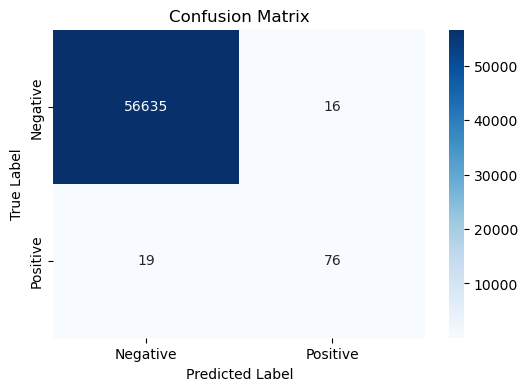

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.80      0.81        95

    accuracy                           1.00     56746
   macro avg       0.91      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [67]:

cm = confusion_matrix(y_test, y_predTest)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_predTest))


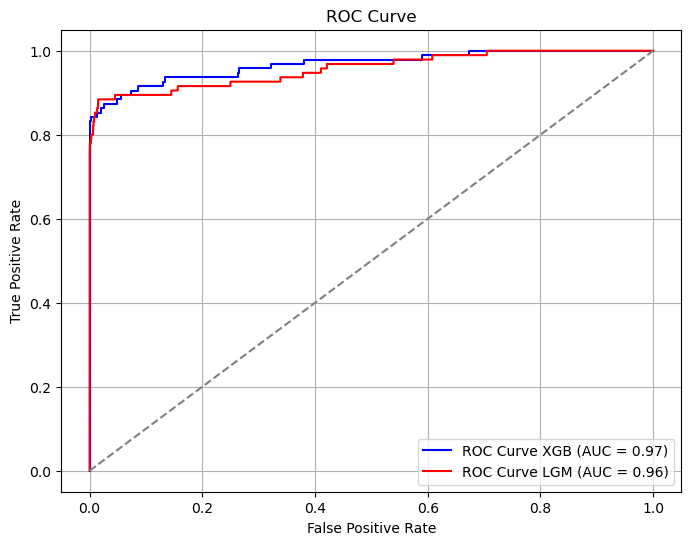

In [56]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fpr_lgm, tpr_lgm, thresholds_lgm = roc_curve(y_test, y_pred_proba_lgm)
roc_auc_lgm = auc(fpr_lgm, tpr_lgm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve XGB (AUC = {roc_auc:.2f})")
plt.plot(fpr_lgm, tpr_lgm, color='red', label=f"ROC Curve LGM (AUC = {roc_auc_lgm:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



## Model Observations

- As XGBoost has more AUC then LGM, it is a better model.
- the XGBoost metrics significantly surpassed the Benchmark Scores
- the Scores below indicate thet while benchmark model has higher recall, it gave significantly more False Positives.
- The XBG was able to maintain the recall while increase Precision by 10X

## Benchmark was:
- Recall : 88%
- precision : 8%
- f1Score : 14%


## Current XGBoost performance is:
- Recall : 80%
- precision : 82%
- f1Score : 81%

## Post Model Feature Analysis using SHAP

In [71]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summarize the results
print(f"Shape of SHAP Values: {len(shap_values)}")

Shape of SHAP Values: 56746


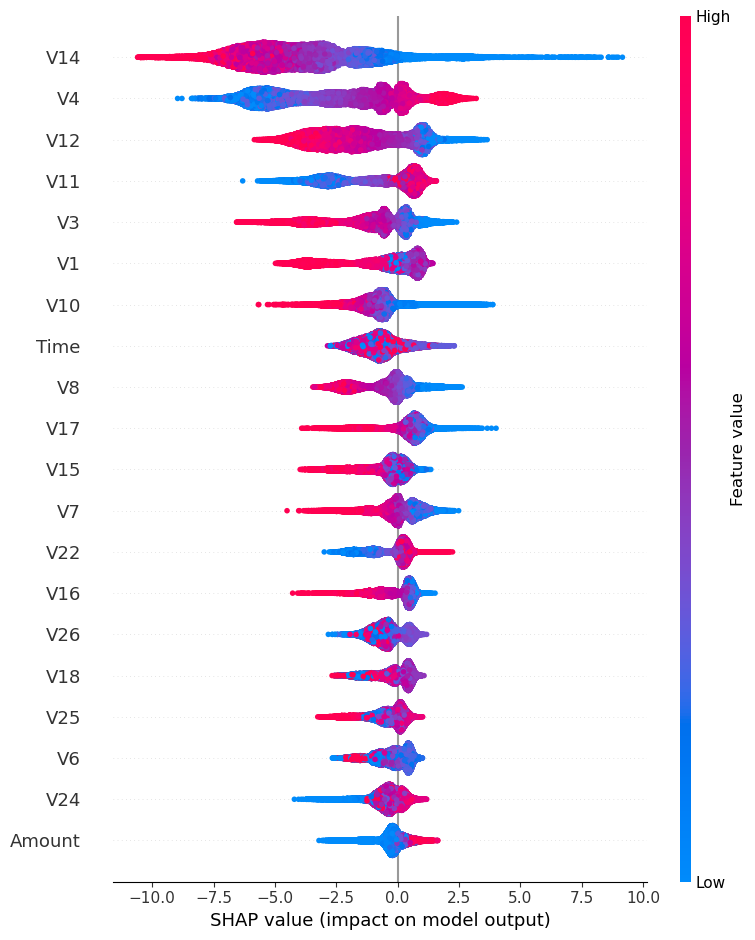

In [72]:
shap.summary_plot(shap_values, X_test)


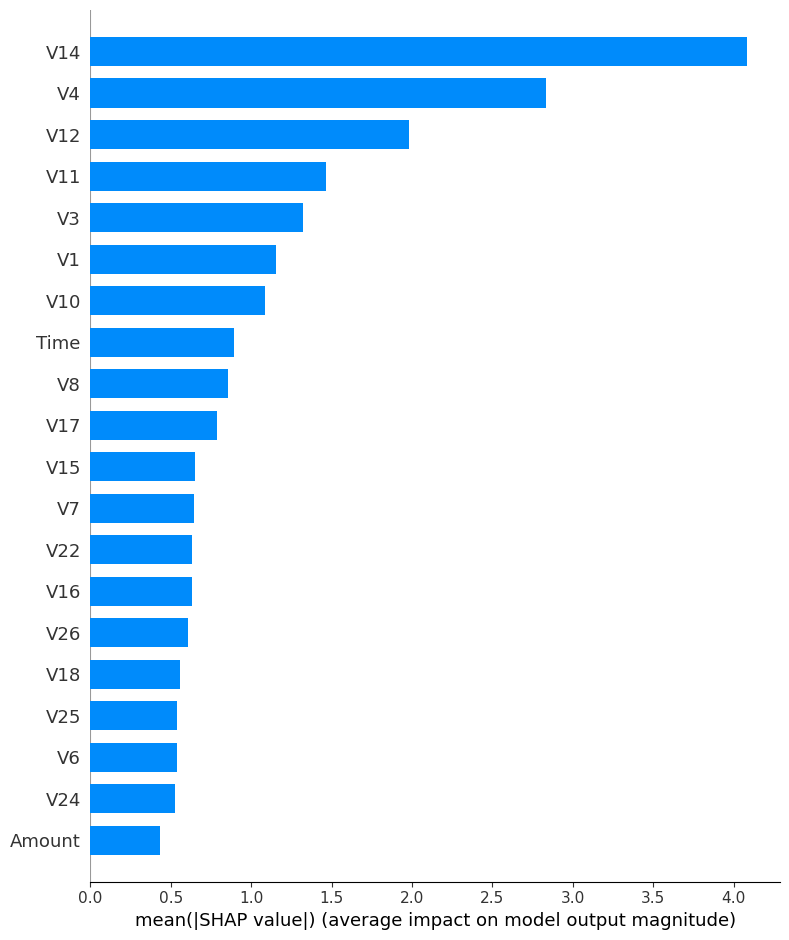

In [73]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Unsupervised Model

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = df.copy()
X = data.drop(columns=['Class'], errors='ignore')
y = data.get('Class', None)

In [26]:
data.Class.value_counts(normalize=True)

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

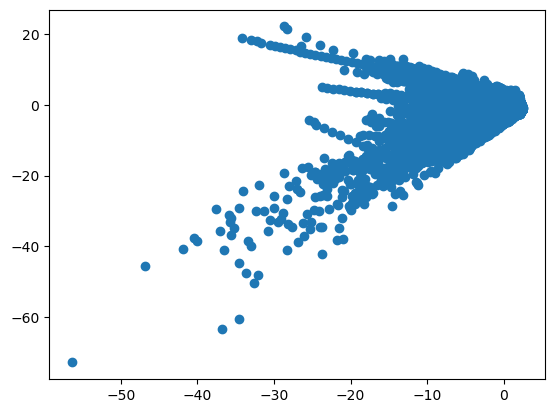

In [27]:
plt.scatter(data.iloc[:,1],data.iloc[:,2])

### scaling it for the isolation forest


In [28]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Initialize Isolation Forest
iso_forest = IsolationForest(
    n_estimators=300,
    contamination="auto",
    random_state=42
)

iso_forest.fit(X_scaled)

anomaly_predictions = iso_forest.predict(X_scaled)

anomaly_labels = np.where(anomaly_predictions == -1, 1, 0)

data['anomaly'] = anomaly_labels


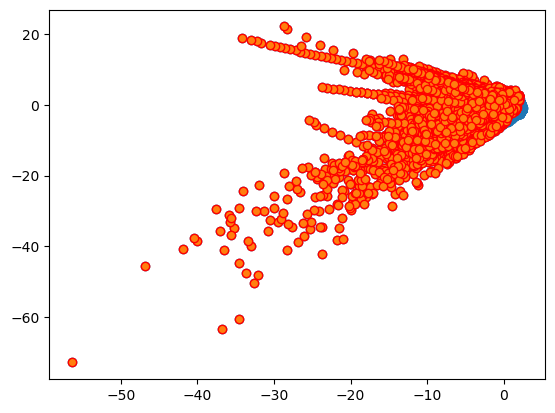

In [80]:
x = data.values
index = np.where(data['anomaly']==1)
plt.scatter(data.iloc[:,1],data.iloc[:,2])
plt.scatter(x[index,1],x[index,2],edgecolors='r')

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

if y is not None:
    print("Classification Report:")
    print(classification_report(y, anomaly_labels))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y, anomaly_labels))
    
    # Compute ROC-AUC score
    auc_score = roc_auc_score(y, anomaly_labels)
    print(f"ROC-AUC Score: {auc_score}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    283253
           1       0.03      0.81      0.05       473

    accuracy                           0.95    283726
   macro avg       0.51      0.88      0.51    283726
weighted avg       1.00      0.95      0.97    283726

Confusion Matrix:
[[268803  14450]
 [    91    382]]
ROC-AUC Score: 0.8782982647782537


## Observations Of Model

- original fraud-event rate is 0.1%

### Setting up a contamination of 1% 
- gets a ROC-AUC Score: 77%
- However, precision:  9%
- recall : 56%

### Setting up a contamination of 0.1% 
- gets a ROC-AUC Score: 58%
- precision:  30%
- recall : 18%

### Setting up a contamination of auto
- gets a ROC-AUC Score: 5%
- precision:  3%
- recall : 81%

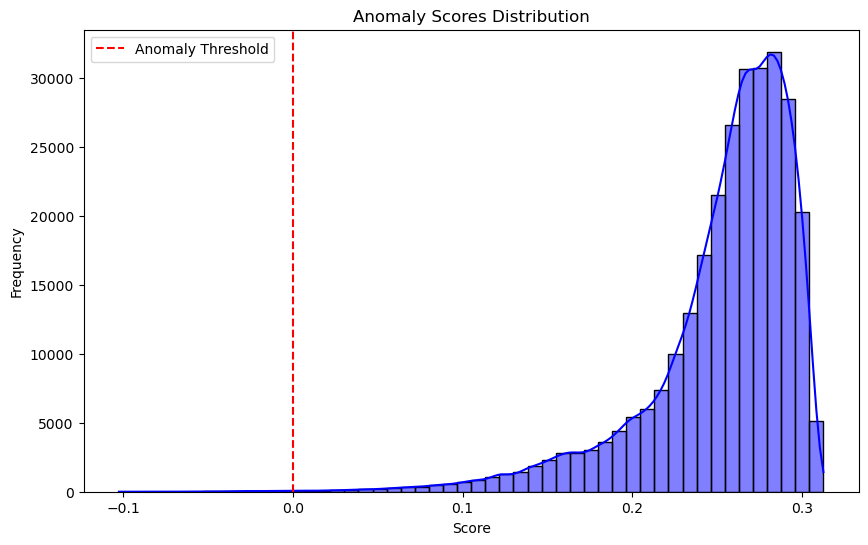

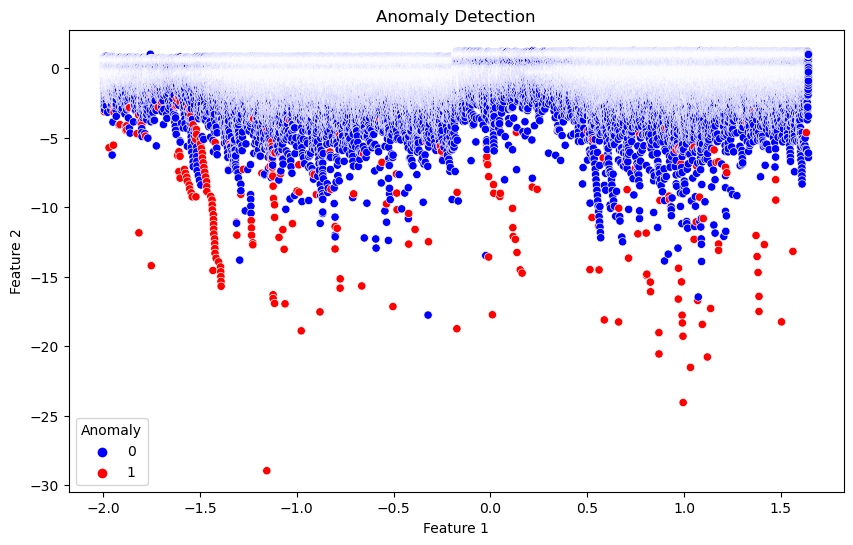

In [72]:
# Plot anomaly scores
anomaly_scores = iso_forest.decision_function(X_scaled)

plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, bins=50, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Anomaly Scores Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Scatter plot of anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1], 
    hue=data['anomaly'], palette={0: 'blue', 1: 'red'}
)
plt.title("Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Anomaly")
plt.show()


In [32]:
import shap
import numpy as np

# Define a prediction function
def predict_fn(data):
    return iso_forest.decision_function(data)  # Use decision_function for anomaly scores

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_fn, shap.sample(X, 100))  # Sampling for efficiency

# Compute SHAP values for the first instance
shap_values = explainer.shap_values(X[:1])


  0%|          | 0/1 [00:00<?, ?it/s]

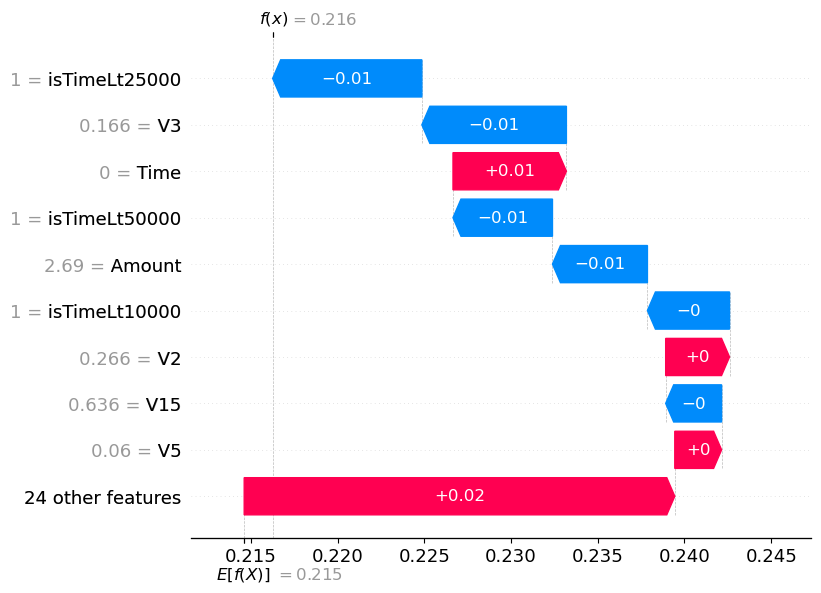

In [35]:
feature_names = X.columns.to_list()  # Replace with actual feature names if available
X_df = pd.DataFrame(X, columns=feature_names)


shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0], 
        base_values=explainer.expected_value, 
        data=X_df.iloc[1]  # Use the second instance with feature names
    )
)